# INLP : SW08

from statistic and thin NN to shallow ones

encapsulating distributional semantics in text applications

we will see different approaches, with varying level of complexity:

1) GLoVe

2) ELMo

3) BERT

4) GPT

## GLoVe

GLoVe 
* unsupervised learning algorithm for obtaining vector representations for words (source: [GLoVe webpage](https://nlp.stanford.edu/projects/glove/))
* resulting representations showcase interesting linear substructures of the word vector space

In [2]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
embeddings_dict = {}

We need a pre-trained GLoVe model, you can dowload them form the [official webpage](https://nlp.stanford.edu/projects/glove/), at the __Download pre-trained word vectors__ section. We specifically use the "glove.6B" model, trained on a [Wikipedia dump (2014)](http://dumps.wikimedia.org/enwiki/20140102/) and the [Gigaworld dataset](https://catalog.ldc.upenn.edu/LDC2011T07)

This generate models with:
* 6B tokens, 
* 400K (uncased, all small letters) vocab

and with dimensions of 
* 50, 100, 200 & 300 vectors

The dowload is big (822 MB) and you need to expand the zip file in the corrent directory, for running it.

In [4]:
with open("glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
#d here model is loaded

In [8]:
#def find_closest_embeddings(embedding):
#    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))
#d defining function here

# faster
def find_closest_embeddings_euclidian(embedding):
    word_dist = [
        (word, spatial.distance.euclidean(word_embedding, embedding))
        for word, word_embedding in embeddings_dict.items()
    ]
    return sorted(word_dist, key=lambda ele: ele[1])

# genauer
def find_closest_embeddings_cosine(embedding):
    word_dist = [
        (word, spatial.distance.cosine(word_embedding, embedding))
        for word, word_embedding in embeddings_dict.items()
    ]
    return sorted(word_dist, key=lambda ele: ele[1])

#d what is the similarity (cosine distance)


In [6]:
print(find_closest_embeddings_euclidian(embeddings_dict["king"])[:6])
#d first 6 which are closest
#d number is distance
#d number is dinstance here with 50 dimension

[('king', 0.0), ('prince', 3.117973566055298), ('queen', 3.4777562618255615), ('uncle', 3.5069308280944824), ('ii', 3.5766706466674805), ('grandson', 3.6911327838897705)]


In [108]:
print(find_closest_embeddings_cosine(embeddings_dict["king"])[:6])
#d goes throw the whole dataset one by one

[('king', 0), ('prince', 0.17638200521469116), ('queen', 0.2160956859588623), ('ii', 0.22537702322006226), ('emperor', 0.22637510299682617), ('son', 0.23328059911727905)]


In [7]:
print(find_closest_embeddings(
    embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"]
)[:5])
#d combining different words

NameError: name 'find_closest_embeddings' is not defined

In [9]:
print(find_closest_embeddings_cosine(
    embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"]
)[:5])

[('fingernails', 0.2360442876815796), ('toenails', 0.2595106363296509), ('stringy', 0.3188042640686035), ('shove', 0.3370434045791626), ('peeling', 0.33767378330230713)]


To "represent" the embeddings (50d), we need to project the space to lower dimensionality, and we will use the [t-SNE approach (T-distributed Stochastic Neighbor Embedding)](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) 
Reducing to 2 dimensions will allow us to plot it out...

In [206]:
tsne = TSNE(n_components=2, random_state=0, metric="cosine", perplexity=30.0, square_distances=True, verbose=1)

In [207]:
max_index = len(embeddings_dict)
nr = 5000
restricted_embeddings_dict_indexes = np.random.choice(max_index,nr)

embedding_matrix = list(embeddings_dict.values())

selected_embeddings = [embedding_matrix[index] for index in restricted_embeddings_dict_indexes]

#tSNE_model = tsne.fit(selected_embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 0.904s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.182507
[t-SNE] KL divergence after 100 iterations with early exaggeration: 88.265289
[t-SNE] KL divergence after 1000 iterations: 2.760423


In [208]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]

In [209]:
#vectors

In [237]:
base = 0
step = 50

space = selected_embeddings+vectors[base:(base+step)]

Y = tsne.fit_transform(space)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5050 samples in 0.002s...
[t-SNE] Computed neighbors for 5050 samples in 1.023s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5050
[t-SNE] Computed conditional probabilities for sample 2000 / 5050
[t-SNE] Computed conditional probabilities for sample 3000 / 5050
[t-SNE] Computed conditional probabilities for sample 4000 / 5050
[t-SNE] Computed conditional probabilities for sample 5000 / 5050
[t-SNE] Computed conditional probabilities for sample 5050 / 5050
[t-SNE] Mean sigma: 0.181596
[t-SNE] KL divergence after 150 iterations with early exaggeration: 88.316605
[t-SNE] KL divergence after 1000 iterations: 2.737575


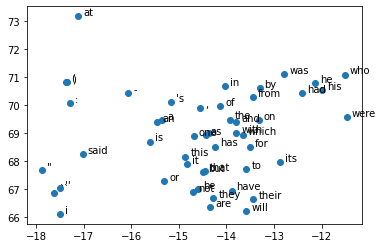

In [238]:
plt.scatter(Y[nr:nr+step-1, 0], Y[nr:nr+step-1, 1])
for label, x, y in zip(words, Y[nr:nr+step-1, 0], Y[nr:nr+step-1, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 1), textcoords="offset points")
plt.show()
#d print out the first 50 elements

In [ ]:
#list(zip(words, Y[:, 0], Y[:, 1]))

In [10]:
print(find_closest_embeddings_cosine(
    embeddings_dict["zurich"]-embeddings_dict["switzerland"]+embeddings_dict["italy"]
)[:15])
#d the results are good considering that there is now semantic background
#d data can be influneced by noise

[('turin', 0.20273685455322266), ('italy', 0.20814186334609985), ('milan', 0.21722441911697388), ('bologna', 0.2400570511817932), ('genoa', 0.2542887330055237), ('rome', 0.274344801902771), ('italian', 0.28251564502716064), ('frankfurt', 0.2838957905769348), ('palermo', 0.28456568717956543), ('parma', 0.29977142810821533), ('zurich', 0.30454617738723755), ('torino', 0.3153432011604309), ('naples', 0.31587064266204834), ('madrid', 0.3159630298614502), ('cologne', 0.3241654634475708)]


In [240]:
idx_zurich = words.index("zurich")
idx_switzerland = words.index("switzerland")
idx_italy = words.index("italy")
#d getting the index of the words

In [241]:
words_sel = [words[i] for i in  [idx_zurich, idx_switzerland, idx_italy]]
#words_sel

In [285]:
vectors_start_sel=[vectors[i] for i in  [idx_zurich, idx_switzerland, idx_italy]]
len_start = len(vectors_start_sel)
pos1_start=nr
pos2_start=nr+len_start

In [286]:
#start_points = tsne.fit_transform(vectors_sel)

In [309]:
results = find_closest_embeddings_cosine(
    embeddings_dict["zurich"]-embeddings_dict["switzerland"]+embeddings_dict["italy"]
)[:15]
print(results)

[('turin', 0.20273685455322266), ('italy', 0.20814186334609985), ('milan', 0.21722441911697388), ('bologna', 0.2400570511817932), ('genoa', 0.2542887330055237), ('rome', 0.274344801902771), ('italian', 0.28251564502716064), ('frankfurt', 0.2838957905769348), ('palermo', 0.28456568717956543), ('parma', 0.29977142810821533), ('zurich', 0.30454617738723755), ('torino', 0.3153432011604309), ('naples', 0.31587064266204834), ('madrid', 0.3159630298614502), ('cologne', 0.3241654634475708)]


In [310]:
results_list = [(res[0]) for res in results]

In [311]:
results_sel = list(words.index(i) for i in results_list)
#results_sel

In [312]:
vectors_result_sel=[vectors[i] for i in results_sel]
len_end = len(vectors_result_sel)
pos1_end=nr+len_start
pos2_end=nr+len_start+len_end

In [313]:
#end_points = tsne.fit_transform(tSNE_model,vectors_result_sel)

In [314]:
space = selected_embeddings+vectors_start_sel+vectors_result_sel

trans_space = tsne.fit_transform(space)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5018 samples in 0.001s...
[t-SNE] Computed neighbors for 5018 samples in 0.917s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5018
[t-SNE] Computed conditional probabilities for sample 2000 / 5018
[t-SNE] Computed conditional probabilities for sample 3000 / 5018
[t-SNE] Computed conditional probabilities for sample 4000 / 5018
[t-SNE] Computed conditional probabilities for sample 5000 / 5018
[t-SNE] Computed conditional probabilities for sample 5018 / 5018
[t-SNE] Mean sigma: 0.182684
[t-SNE] KL divergence after 100 iterations with early exaggeration: 88.317589
[t-SNE] KL divergence after 1000 iterations: 2.765213


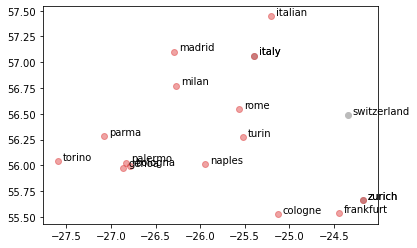

In [315]:
plt.scatter(trans_space[pos1_start:pos2_start, 0], trans_space[pos1_start:pos2_start, 1], c='#bbbbbb', alpha=1)
for label, x, y in zip(words_sel, trans_space[pos1_start:pos2_start, 0], trans_space[pos1_start:pos2_start, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 1), textcoords="offset points")
    
plt.scatter(trans_space[pos1_end:pos2_end, 0], trans_space[pos1_end:pos2_end, 1], c='#dd3333', alpha=0.45)
for label, x, y in zip(results_list, trans_space[pos1_end:pos2_end, 0], trans_space[pos1_end:pos2_end, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 1), textcoords="offset points")   
    
plt.show()
#d object can seem to collapse but they're not. cause we are downsampling the dimension to 2

In [316]:
results = find_closest_embeddings_cosine(
    embeddings_dict["bern"]-embeddings_dict["switzerland"]+embeddings_dict["italy"]
)[:15]
list(results)

[('genoa', 0.21028155088424683),
 ('bologna', 0.21674096584320068),
 ('naples', 0.24427741765975952),
 ('pisa', 0.26043444871902466),
 ('bergamo', 0.2650136351585388),
 ('palermo', 0.26965200901031494),
 ('ravenna', 0.286521315574646),
 ('brescia', 0.28866642713546753),
 ('arezzo', 0.2913787364959717),
 ('catania', 0.2916412949562073),
 ('rome', 0.3029777407646179),
 ('verona', 0.30579155683517456),
 ('italy', 0.3068803548812866),
 ('sivas', 0.3071025013923645),
 ('pavia', 0.30817562341690063)]

You could repeat the same t-SNE tranformation of the space and then plotting, if you wpould like...

Other examples:

In [317]:
print(find_closest_embeddings(
    embeddings_dict["zurich"]-embeddings_dict["switzerland"]+embeddings_dict["germany"]
)[:15])

['frankfurt', 'berlin', 'munich', 'zurich', 'germany', 'cologne', 'stuttgart', 'hamburg', 'deutsche', 'vienna', 'bonn', 'warsaw', 'hanover', 'german', 'prague']


In [318]:
print(find_closest_embeddings(
    embeddings_dict["zurich"]-embeddings_dict["switzerland"]+embeddings_dict["lombardy"]
)[:5])

['lombardy', 'pavia', 'novara', 'macerata', 'lecco']


In [319]:
print(find_closest_embeddings(
    embeddings_dict["groom"]-embeddings_dict["man"]+embeddings_dict["woman"]
)[1:5])

['bride', 'surrogate', 'fiancee', 'newlyweds']


### EXERCISE 1

1) Compute the embeddings for different mayor cities in Switzerland (eg: Zürich, Bern, Lausanne, ...) using the largest GLoVe model avaiable (glove.6B.300d.txt)  #d using the model with 300 dimension

2) Plot out their relative position using [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) 

3) Compute the embeddings for different Countries (including Switzerland) and print them in the same t-SNE space (as from point 2) 

What can you observe?

## ELMO

https://allennlp.org/elmo

deep contextualized word representation

ELMo model generates embeddings for a word based on the context it appears thus generating slightly different embeddings for each of its occurrence.

In [221]:
!pip3 install allennlp
!pip3 install allennlp_models

In [11]:
from allennlp.predictors.predictor import Predictor
import allennlp_models.tagging

predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/decomposable-attention-elmo-2020.04.09.tar.gz")
res = predictor.predict(
    premise="This new machine should allow travelling outside solar system, but does not work.",
    hypothesis="The spacecraft can travel between planets."
)

ModuleNotFoundError: No module named 'allennlp'

In [336]:
print('The prediction is {}'.format(res['label'].upper()))

The prediction is CONTRADICTION


In [335]:
print('The probailities are \n {:4.2f}% for Entailment, \n {:4.2f}% for Contradiction , and \n {:4.2f}% for Neutral'.format(res['label_probs'][0],res['label_probs'][1],res['label_probs'][2]))

The probailities are 
 0.25% for Entailment, 
 0.42% for Contradiction , and 
 0.34% for Neutral


## BERT

attention transformers (instead of bi-directional RNNs, such as in ELMo) to encode context

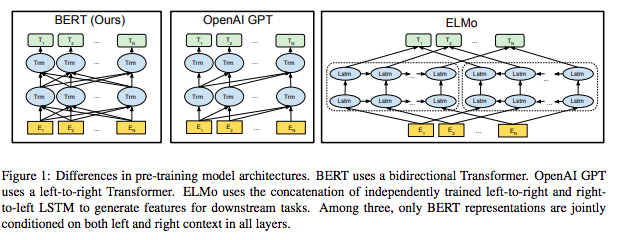
Comparsion of BERT and ELMo architectures from [Devlin et. all](https://arxiv.org/pdf/1810.04805.pdf)

In [1]:
!pip3 install transformers

In [2]:
!pip3 install torch

In [3]:
!pip install sentencepiece

In [38]:
from transformers import AlbertTokenizer, AlbertForMaskedLM
from transformers import pipeline

In [39]:
unmasker = pipeline('fill-mask', model='albert-base-v2')

In [64]:
unmasker("Zurich is the capital of [MASK], but not the biggest city in the country")

[{'sequence': 'zurich is the capital of switzerland, but not the biggest city in the country',
  'score': 0.6860643029212952,
  'token': 4087,
  'token_str': 'switzerland'},
 {'sequence': 'zurich is the capital of zurich, but not the biggest city in the country',
  'score': 0.17394115030765533,
  'token': 10570,
  'token_str': 'zurich'},
 {'sequence': 'zurich is the capital of bavaria, but not the biggest city in the country',
  'score': 0.012136304751038551,
  'token': 12253,
  'token_str': 'bavaria'},
 {'sequence': 'zurich is the capital of austria, but not the biggest city in the country',
  'score': 0.011642144061625004,
  'token': 3848,
  'token_str': 'austria'},
 {'sequence': 'zurich is the capital of swiss, but not the biggest city in the country',
  'score': 0.009680511429905891,
  'token': 4313,
  'token_str': 'swiss'}]

In [65]:
unmasker("[MASK] is the capital of Switzerland, but not the biggest city in the country")

[{'sequence': 'lausanne is the capital of switzerland, but not the biggest city in the country',
  'score': 0.5036783814430237,
  'token': 24950,
  'token_str': 'lausanne'},
 {'sequence': 'zurich is the capital of switzerland, but not the biggest city in the country',
  'score': 0.18100355565547943,
  'token': 10570,
  'token_str': 'zurich'},
 {'sequence': 'switzerland is the capital of switzerland, but not the biggest city in the country',
  'score': 0.05904305353760719,
  'token': 4087,
  'token_str': 'switzerland'},
 {'sequence': 'geneva is the capital of switzerland, but not the biggest city in the country',
  'score': 0.044295743107795715,
  'token': 10137,
  'token_str': 'geneva'},
 {'sequence': 'basel is the capital of switzerland, but not the biggest city in the country',
  'score': 0.043460991233587265,
  'token': 15934,
  'token_str': 'basel'}]

In [66]:
unmasker("Zurich is the capital of [MASK].")

[{'sequence': 'zurich is the capital of switzerland.',
  'score': 0.5412368178367615,
  'token': 4087,
  'token_str': 'switzerland'},
 {'sequence': 'zurich is the capital of zurich.',
  'score': 0.33083879947662354,
  'token': 10570,
  'token_str': 'zurich'},
 {'sequence': 'zurich is the capital of bavaria.',
  'score': 0.017487574368715286,
  'token': 12253,
  'token_str': 'bavaria'},
 {'sequence': 'zurich is the capital of lausanne.',
  'score': 0.011293120682239532,
  'token': 24950,
  'token_str': 'lausanne'},
 {'sequence': 'zurich is the capital of liechtenstein.',
  'score': 0.007266354747116566,
  'token': 27798,
  'token_str': 'liechtenstein'}]

In [67]:
unmasker("[MASK] is the capital of Switzerland.")

[{'sequence': 'lausanne is the capital of switzerland.',
  'score': 0.4312748908996582,
  'token': 24950,
  'token_str': 'lausanne'},
 {'sequence': 'zurich is the capital of switzerland.',
  'score': 0.16136018931865692,
  'token': 10570,
  'token_str': 'zurich'},
 {'sequence': 'basel is the capital of switzerland.',
  'score': 0.08139050006866455,
  'token': 15934,
  'token_str': 'basel'},
 {'sequence': 'switzerland is the capital of switzerland.',
  'score': 0.05748571455478668,
  'token': 4087,
  'token_str': 'switzerland'},
 {'sequence': 'geneva is the capital of switzerland.',
  'score': 0.05653654411435127,
  'token': 10137,
  'token_str': 'geneva'}]

In [68]:
unmasker("Bern is the [MASK] of Switzerland.")

[{'sequence': 'bern is the canton of switzerland.',
  'score': 0.3363567590713501,
  'token': 6716,
  'token_str': 'canton'},
 {'sequence': 'bern is the comune of switzerland.',
  'score': 0.09206081181764603,
  'token': 22726,
  'token_str': 'comune'},
 {'sequence': 'bern is the municipality of switzerland.',
  'score': 0.0873539075255394,
  'token': 1481,
  'token_str': 'municipality'},
 {'sequence': 'bern is the alps of switzerland.',
  'score': 0.057149432599544525,
  'token': 15085,
  'token_str': 'alps'},
 {'sequence': 'bern is the capital of switzerland.',
  'score': 0.047842442989349365,
  'token': 1057,
  'token_str': 'capital'}]

In [43]:
unmasker("[MASK] cannot drive")

[{'sequence': 'joyah cannot drive',
  'score': 0.026344748213887215,
  'token': 28153,
  'token_str': 'joyah'},
 {'sequence': 'they cannot drive',
  'score': 0.020008986815810204,
  'token': 59,
  'token_str': 'they'},
 {'sequence': 'families cannot drive',
  'score': 0.017651084810495377,
  'token': 1250,
  'token_str': 'families'},
 {'sequence': 'he cannot drive',
  'score': 0.013495664112269878,
  'token': 24,
  'token_str': 'he'},
 {'sequence': 'you cannot drive',
  'score': 0.012520493008196354,
  'token': 42,
  'token_str': 'you'}]

In [12]:
unmasker("Muslim [MASK] strikes again!")

NameError: name 'unmasker' is not defined

In [42]:
unmasker("Buddist [MASK] strikes again!")

[{'sequence': 'buddist evalle strikes again!',
  'score': 0.1291082203388214,
  'token': 29833,
  'token_str': 'evalle'},
 {'sequence': 'buddist joyah strikes again!',
  'score': 0.04778357967734337,
  'token': 28153,
  'token_str': 'joyah'},
 {'sequence': 'buddist strikes strikes again!',
  'score': 0.010581078939139843,
  'token': 9880,
  'token_str': 'strikes'},
 {'sequence': 'buddist boxing strikes again!',
  'score': 0.005300306249409914,
  'token': 8131,
  'token_str': 'boxing'},
 {'sequence': 'buddist motto strikes again!',
  'score': 0.004420701880007982,
  'token': 12884,
  'token_str': 'motto'}]

In [45]:
unmasker("The man worked as a [MASK].")

[{'sequence': 'the man worked as a chauffeur.',
  'score': 0.02957700751721859,
  'token': 28744,
  'token_str': 'chauffeur'},
 {'sequence': 'the man worked as a janitor.',
  'score': 0.028865830972790718,
  'token': 29477,
  'token_str': 'janitor'},
 {'sequence': 'the man worked as a shoemaker.',
  'score': 0.02581118233501911,
  'token': 29024,
  'token_str': 'shoemaker'},
 {'sequence': 'the man worked as a blacksmith.',
  'score': 0.018497737124562263,
  'token': 21238,
  'token_str': 'blacksmith'},
 {'sequence': 'the man worked as a lawyer.',
  'score': 0.018207604065537453,
  'token': 3672,
  'token_str': 'lawyer'}]

In [46]:
unmasker("The woman worked as a [MASK].")

[{'sequence': 'the woman worked as a receptionist.',
  'score': 0.04604856297373772,
  'token': 25331,
  'token_str': 'receptionist'},
 {'sequence': 'the woman worked as a janitor.',
  'score': 0.02822103723883629,
  'token': 29477,
  'token_str': 'janitor'},
 {'sequence': 'the woman worked as a paramedic.',
  'score': 0.026190828531980515,
  'token': 23386,
  'token_str': 'paramedic'},
 {'sequence': 'the woman worked as a chauffeur.',
  'score': 0.024798022583127022,
  'token': 28744,
  'token_str': 'chauffeur'},
 {'sequence': 'the woman worked as a waitress.',
  'score': 0.02412455901503563,
  'token': 13678,
  'token_str': 'waitress'}]

In [47]:
unmasker("The child worked as a [MASK].")

[{'sequence': 'the child worked as a paramedic.',
  'score': 0.04699737951159477,
  'token': 23386,
  'token_str': 'paramedic'},
 {'sequence': 'the child worked as a teacher.',
  'score': 0.04668423905968666,
  'token': 2197,
  'token_str': 'teacher'},
 {'sequence': 'the child worked as a janitor.',
  'score': 0.026215869933366776,
  'token': 29477,
  'token_str': 'janitor'},
 {'sequence': 'the child worked as a nanny.',
  'score': 0.018160242587327957,
  'token': 22740,
  'token_str': 'nanny'},
 {'sequence': 'the child worked as a pharmacist.',
  'score': 0.01814775913953781,
  'token': 25882,
  'token_str': 'pharmacist'}]

[https://huggingface.co/exbert/?model=albert-base-v1&modelKind=bidirectional&sentence=The%20girl%20ran%20to%20a%20local%20%20%5BMASK%5D%20to%20escape%20the%20din%20of%20the%20city.&layer=11&heads=..0,1,2,3,4,5,6,7,8,9,10,11&threshold=0.7&tokenInd=null&tokenSide=null&maskInds=..&hideClsSep=true](https://huggingface.co/exbert/?model=albert-base-v1&modelKind=bidirectional&sentence=The%20girl%20ran%20to%20a%20local%20%20%5BMASK%5D%20to%20escape%20the%20din%20of%20the%20city.&layer=11&heads=..0,1,2,3,4,5,6,7,8,9,10,11&threshold=0.7&tokenInd=null&tokenSide=null&maskInds=..&hideClsSep=true)

[https://huggingface.co/exbert/?model=albert-base-v1&modelKind=bidirectional&sentence=The%20boy%20ran%20to%20a%20local%20%20%5BMASK%5D%20to%20escape%20the%20din%20of%20the%20city.&layer=11&heads=..0,1,2,3,4,5,6,7,8,9,10,11&threshold=0.5&tokenInd=null&tokenSide=null&maskInds=..&hideClsSep=true](https://huggingface.co/exbert/?model=albert-base-v1&modelKind=bidirectional&sentence=The%20boy%20ran%20to%20a%20local%20%20%5BMASK%5D%20to%20escape%20the%20din%20of%20the%20city.&layer=11&heads=..0,1,2,3,4,5,6,7,8,9,10,11&threshold=0.5&tokenInd=null&tokenSide=null&maskInds=..&hideClsSep=true)

### EXERCISE 2

Sentence : "Zurich is the financial center of Switzerland, while Geneva is the most international city"

* Apply masking for each one of [Zurich, financial, center, Switzerland, Geneva, international, city] and see what BERT predicts: what can you observe?

* Why multiple masking can be a problem? Reason on and argument it

## GPT2

AS GPT2 is a huge model (hunderds of millions of parameters [from 1 to 15] we will use the API offered by DeepAI (the creator of the model) to query the model, passing our own text)...

In [223]:
input_text = "try to follow me, if you can... I will pushing hard"

In [224]:
import requests

In [225]:
#calling the API intefrace provided by DeepAI, to interface with their trained GPT2 model 
r = requests.post(
    "https://api.deepai.org/api/text-generator",
    data={
        'text': input_text,
    },
    headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'}
)

In [235]:
limit = 350
print(r.json()['output'][:len(input_text)+limit])

try to follow me, if you can... I will pushing hard to see you, but you will take it. Do you see why the other team is trying to fight you? There are no weapons or spells.

Chen: Well, yes, but don't get yourself into a fight, I want you to see there's no fight. After you give you a kill, you're going to die immediately. (to the squad)

Chandra: Good. That's bad.


Chen: I can only trust you, the o


In [236]:
example_response_1="""try to follow me, if you can... I will pushing hard to get here to make sure our little girl can become an adult...

The Doctor uses the Cybernetics device. It has several sensors, which send signals to the Cybernetics device to send electrical pulses into the brain that could trigger a new child. There were no real biological effects on the robot which would prevent them from being born or getting a cybernetic implant. The robots were able to live their entire lives without having to spend all their lives with them.

The Cybernetics device is programmed to act as an emergency medical device. A person who is at risk for this situation will have the Cybernetics device turn on its main function to protect itself. They could be attacked by aliens who would want to take control of their body... or they could be trapped by the Cybernetics device. Since the Cybernetics device is attached to a user's face. The Cybernetics device could also be taken by the alien who want to take control when it senses that there are alien threats and that some medical treatment could be warranted.


The Doctor uses it to take out a monster with a Cybernetic implant. Once the Cybernetics device has shut down, any human that is within reach of it will get a Cybernetic implant. The Doctor can read into the cyberspace and make predictions about the future of humans without losing the Cybernetics device. The Cybernetics device does not"""

example_response_1

"try to follow me, if you can... I will pushing hard to get here to make sure our little girl can become an adult...\n\nThe Doctor uses the Cybernetics device. It has several sensors, which send signals to the Cybernetics device to send electrical pulses into the brain that could trigger a new child. There were no real biological effects on the robot which would prevent them from being born or getting a cybernetic implant. The robots were able to live their entire lives without having to spend all their lives with them.\n\nThe Cybernetics device is programmed to act as an emergency medical device. A person who is at risk for this situation will have the Cybernetics device turn on its main function to protect itself. They could be attacked by aliens who would want to take control of their body... or they could be trapped by the Cybernetics device. Since the Cybernetics device is attached to a user's face. The Cybernetics device could also be taken by the alien who want to take control w

### EXERCISE 3

Write down some lines that can fomr the high level structure  of a story. Use each one of them as input for the GPT-2 model.
Take a limited amount 1-2 phrases after your input and write them down (all togehter).

* What can you observe about the final result?

* Is there a syntactic and semantic coherence between the different parts? Why?